In [63]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [64]:
iris = datasets.load_iris()
 
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.5)

In [65]:
def knn(features_train, labels_train, features_test, k=3):
    y_pred = []
    for i in features_test:
        distances = []
        for _features_train in features_train:
            dist = distance.euclidean(i, _features_train)
            distances.append(dist)
        k_ind = np.argsort(distances)[:k]
        k_nearest_labels = labels_train[k_ind[:k]]
        most_common = np.argmax(np.bincount(k_nearest_labels))
        y_pred.append(most_common)
    return y_pred

For k = 8 accuracy is equal to:  0.9866666666666667


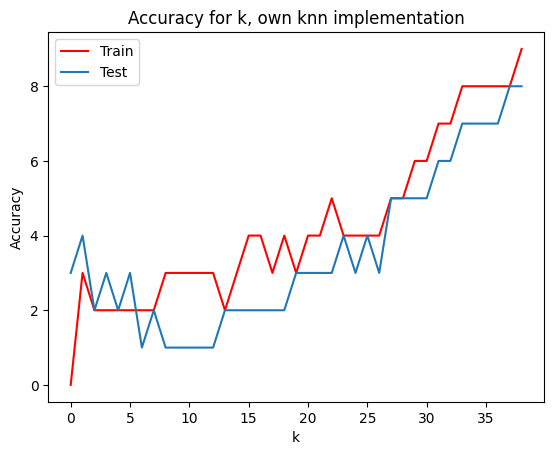

In [66]:
train_err = []
test_err = []
n = 40
for i in range(1, n):
    y_train_pred = knn(features_train, labels_train, features_train, i)
    train_err.append(np.sum(y_train_pred != labels_train))
    test_pred = knn(features_train, labels_train, features_test, i)
    test_err.append(np.sum(test_pred != labels_test))

plt.plot(train_err, label='Train', color='r')
plt.plot(test_err, label='Test')   
plt.title('Accuracy for k, own knn implementation')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

y_pred = knn(features_train, labels_train, features_test, k=9)
accuracy = np.sum(y_pred==labels_test)/len(labels_test)
print('For k = 8 accuracy is equal to: ', accuracy)

For k = 8 accuracy is equal to:  0.96


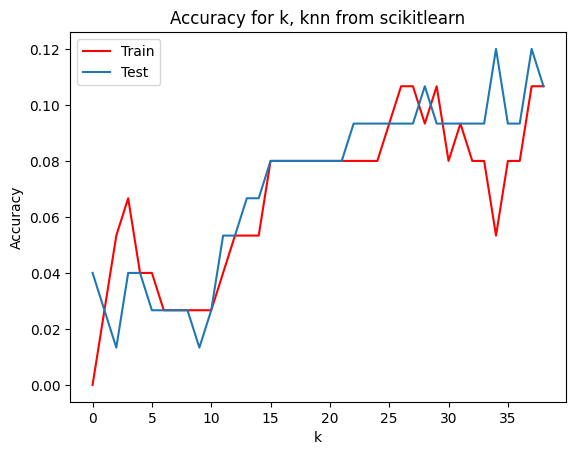

In [67]:
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.5)
# X_train,       X_test,        y_train,      y_test

train_err = []
test_err = []

n = 40
for k in range(1, n):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train, labels_train)
    feat_train_pred = knn.predict(features_train)
    feat_test_pred = knn.predict(features_test)
    train_err.append(1-accuracy_score(labels_train, feat_train_pred))
    test_err.append(1-accuracy_score(labels_test, feat_test_pred))

plt.plot(train_err, label='Train', color='r')
plt.plot(test_err, label='Test')
plt.title('Accuracy for k, knn from scikitlearn')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

k=5
knn = KNeighborsClassifier(k)
knn.fit(features_train, labels_train)
accuracy = accuracy_score(labels_test,knn.predict(features_test))
print('For k = 8 accuracy is equal to: ', accuracy)

In [68]:
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [69]:
clf.predict(iris.data[:1, :])

array([0])

In [70]:
clf.predict_proba(iris.data[:1, :])


array([[1., 0., 0.]])

In [71]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write("iris.pdf")

True

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from keras.datasets import mnist
from sklearn import tree as tr

In [73]:
# wczytywanie danych (np. z biblioteki keras)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
#Ex.1.Divide the data into parameters X and answer y:
 
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])
 
# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Convert digit 10 -> 0 (error in the dataset)    
y[np.where(y==10)]=0
 
# the height and width of the picture with the number
h = 28
w = 28
 
# Ex 2. Please display the number of digits and the number of pixels per image
num_of_pix = X.shape[1]*X.shape[2]
x_tr_shape = str(x_train.shape)
y_tr_shape = str(y_train.shape)
x_te_shape = str(x_test.shape)
y_te_shape = str(y_test.shape)
print('X_train = number of (images, rows, cols): ', x_tr_shape)
print('Y_train = number of images: ', y_tr_shape)
print('X_test = number of (images, rows, cols): ', x_te_shape)
print('Y_test = number of images: ', y_te_shape)
print('Number of pixels per image: ', num_of_pix)

X_train = number of (images, rows, cols):  (60000, 28, 28)
Y_train = number of images:  (60000,)
X_test = number of (images, rows, cols):  (10000, 28, 28)
Y_test = number of images:  (10000,)
Number of pixels per image:  784


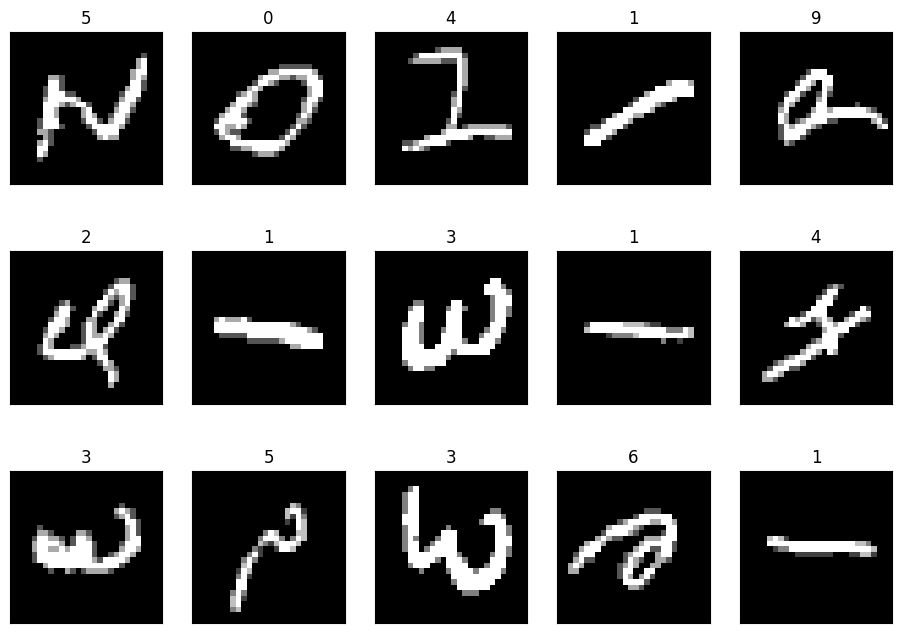

In [74]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
w, h = 28, 28
plot_mnist(X, y, h, w, n_row =3, n_col = 5)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [77]:
DEPTH = 10

classifier = tree.DecisionTreeClassifier(max_depth = 10)
classifier.fit(X_train, y_train)
# nie wiem jak naprawic ten błąd

ValueError: ignored